In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [20]:

df = pd.read_csv('IRIS.csv')

top_2_species = df['species'].value_counts().index[:2]
print(f"2 loại hoa được chọn để train: {list(top_2_species)}")


df_binary = df[df['species'].isin(top_2_species)].copy()

mapping = {top_2_species[0]: 0, top_2_species[1]: 1}
df_binary['species'] = df_binary['species'].map(mapping)

print("Dữ liệu sau khi lọc và đổi nhãn:")
print(df_binary.head())
print("Số lượng mẫu:", len(df_binary))
print("Phân bố nhãn:")
print(df_binary['species'].value_counts())

2 loại hoa được chọn để train: ['Iris-setosa', 'Iris-versicolor']
Dữ liệu sau khi lọc và đổi nhãn:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
Số lượng mẫu: 100
Phân bố nhãn:
species
0    50
1    50
Name: count, dtype: int64


In [21]:
df = df_binary.reset_index(drop=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
x = df.drop('species', axis=1).values
y = df['species'].values

x_t = torch.tensor(x, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

print(x_t.shape, y_t.shape)

torch.Size([100, 4]) torch.Size([100])


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_t, y_t, test_size=0.2, random_state=42
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([80, 4]) torch.Size([80])
torch.Size([20, 4]) torch.Size([20])


In [30]:
class LogisticRegressionModel:
    def __init__(self, input_dim, lr=0.01, epochs=1000):
        self.model = nn.Linear(input_dim, 1)
        self.lr = lr
        self.epochs = epochs
        self.list_loss = []

    def train(self, x_train, y_train):
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            
            # Clear gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(x_train).squeeze()
            
            # Compute loss
            loss = criterion(outputs, y_train.float())
            
            # Lưu loss vào list
            self.list_loss.append(loss.item())
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss.item():.4f}')
        
        return self.list_loss
    
    def predict(self, x):
        """Dự đoán nhãn cho dữ liệu x"""
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(x).squeeze()
            predictions = torch.sigmoid(outputs)
            predicted_labels = (predictions >= 0.5).long()
        return predicted_labels
    
    def evaluate(self, x_test, y_test):
        """Đánh giá model trên tập test"""
        predicted_labels = self.predict(x_test)
        accuracy = (predicted_labels == y_test).sum().item() / len(y_test)
        print(f'Accuracy on test set: {accuracy:.4f}')
        return accuracy

Epoch [100/3600], Loss: 0.4501
Epoch [200/3600], Loss: 0.2959
Epoch [300/3600], Loss: 0.2162
Epoch [400/3600], Loss: 0.1691
Epoch [500/3600], Loss: 0.1385
Epoch [600/3600], Loss: 0.1171
Epoch [700/3600], Loss: 0.1014
Epoch [800/3600], Loss: 0.0894
Epoch [900/3600], Loss: 0.0800
Epoch [1000/3600], Loss: 0.0723
Epoch [1100/3600], Loss: 0.0661
Epoch [1200/3600], Loss: 0.0608
Epoch [1300/3600], Loss: 0.0563
Epoch [1400/3600], Loss: 0.0525
Epoch [1500/3600], Loss: 0.0491
Epoch [1600/3600], Loss: 0.0462
Epoch [1700/3600], Loss: 0.0436
Epoch [1800/3600], Loss: 0.0413
Epoch [1900/3600], Loss: 0.0392
Epoch [2000/3600], Loss: 0.0373
Epoch [2100/3600], Loss: 0.0356
Epoch [2200/3600], Loss: 0.0341
Epoch [2300/3600], Loss: 0.0327
Epoch [2400/3600], Loss: 0.0314
Epoch [2500/3600], Loss: 0.0302
Epoch [2600/3600], Loss: 0.0291
Epoch [2700/3600], Loss: 0.0281
Epoch [2800/3600], Loss: 0.0271
Epoch [2900/3600], Loss: 0.0262
Epoch [3000/3600], Loss: 0.0254
Epoch [3100/3600], Loss: 0.0246
Epoch [3200/3600]

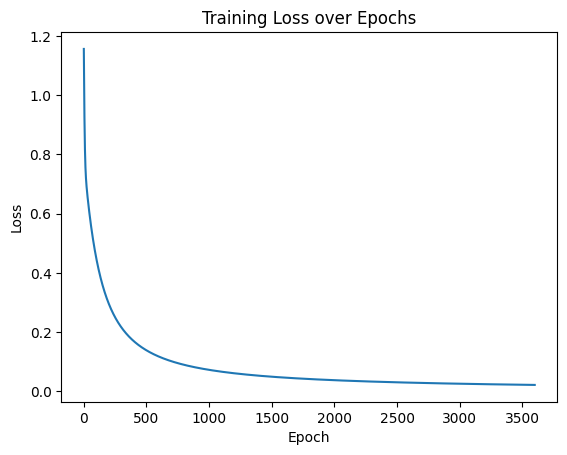

In [32]:
feat = x_train.shape[1]
lr = 0.01
epochs = 3600
model1 = LogisticRegressionModel(feat, lr, epochs)

losses = model1.train(x_train, y_train)

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [34]:
# Đánh giá model trên tập test
accuracy = model1.evaluate(x_test, y_test)

# Xem một số dự đoán
predictions = model1.predict(x_test)
print(f'\nDự đoán 5 mẫu đầu tiên: {predictions}')
print(f'Nhãn thực tế 5 mẫu đầu tiên: {y_test}')

Accuracy on test set: 1.0000

Dự đoán 5 mẫu đầu tiên: tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])
Nhãn thực tế 5 mẫu đầu tiên: tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])
